In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.special import boxcox,boxcox1p, inv_boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('train.csv')

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Replacing missing values of Age column

In [12]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


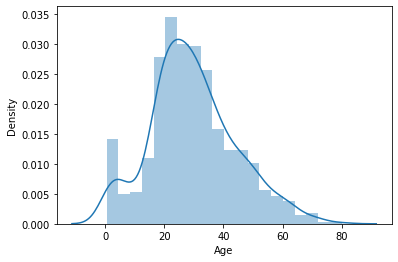

In [13]:
sns.distplot(df.Age)

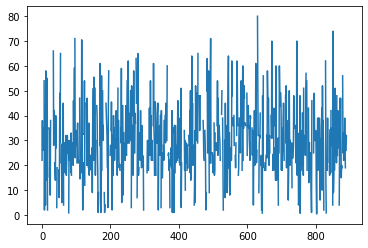

In [14]:
plt.plot(df.Age)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

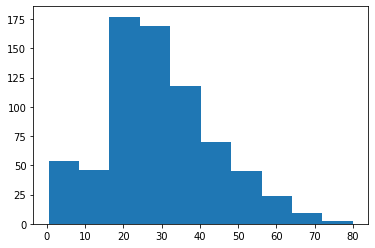

In [15]:
plt.hist(df.Age)

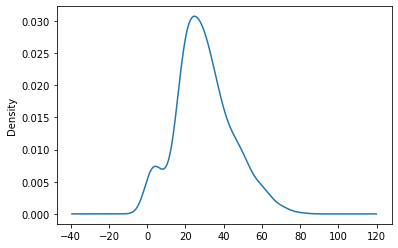

In [16]:
df.Age.plot.density()

In [17]:
stats.skew(df.Age)

nan

In [18]:
df.Age.skew()

0.38910778230082704

In [19]:
# Skewness is close to mean. Replacing missing values with mean.
df.Age = df.Age.fillna(np.mean(df.Age))

In [20]:
df.Age.isna().sum()

0

In [21]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
# Converting the column into number.
df.Cabin = df.Cabin.str.extract('(\d+)')

In [23]:
df.Cabin

0      NaN
1       85
2      NaN
3      123
4      NaN
      ... 
886    NaN
887     42
888    NaN
889    148
890    NaN
Name: Cabin, Length: 891, dtype: object

In [24]:
# Checking the embarked column

In [25]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [26]:
df.Embarked.fillna('S',inplace=True)

In [27]:
df.drop(['Name','Cabin'],axis=1,inplace=True)

In [28]:
df.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [29]:
# Extracting numbers from ticket. 
df.Ticket = df.Ticket.str.extract('(\d+\d+)')

In [30]:
df.Ticket

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: Ticket, Length: 891, dtype: object

In [31]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         6
Fare           0
Embarked       0
dtype: int64

In [32]:
df.dropna(inplace=True)

In [33]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [34]:
# Converting column to numbers.
df.Ticket = pd.to_numeric(df.Ticket)

In [35]:
# Performing one hot encoding with Sex and Embarked columns
df = pd.get_dummies(df,columns=['Sex','Embarked'])

In [36]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Sex_female       uint8
Sex_male         uint8
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
dtype: object

In [37]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,21171,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,17599,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,3101282,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,0,1,0,0,1


In [38]:
df.drop('PassengerId',axis=1,inplace=True)

In [39]:
x = df.drop('Survived',axis=1)
y = df.Survived

In [40]:
x

,Pclass,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,21171,7.2500,0,1,0,0,1
1,1,38.000000,1,0,17599,71.2833,1,0,1,0,0
2,3,26.000000,0,0,3101282,7.9250,1,0,0,0,1
3,1,35.000000,1,0,113803,53.1000,1,0,0,0,1
4,3,35.000000,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,211536,13.0000,0,1,0,0,1
887,1,19.000000,0,0,112053,30.0000,1,0,0,0,1
888,3,29.699118,1,2,6607,23.4500,1,0,0,0,1
889,1,26.000000,0,0,111369,30.0000,0,1,1,0,0


In [41]:
# Scaling or normalization
scaled_x = StandardScaler().fit_transform(x)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,train_size = 0.8,random_state=100)

#### Finding the optimal value of K

In [43]:
params={'n_neighbors':range(1,11)}

In [44]:
model_cv = GridSearchCV(KNeighborsClassifier(),params)

In [45]:
model_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)})

In [46]:
model_cv.best_params_

{'n_neighbors': 6}

In [47]:
model_knn = KNeighborsClassifier(n_neighbors=6).fit(x_train,y_train)

In [48]:
pred = model_knn.predict(x_test)

In [49]:
accuracy_score(y_test,pred)

0.8305084745762712

In [50]:
confusion_matrix(y_test,pred)

array([[107,   6],
       [ 24,  40]])

In [51]:
error = []
for i in range(1,50):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_i = model_knn.predict(x_test)
    error.append(1-accuracy_score(y_test,pred_i))

<Figure size 1152x648 with 0 Axes>

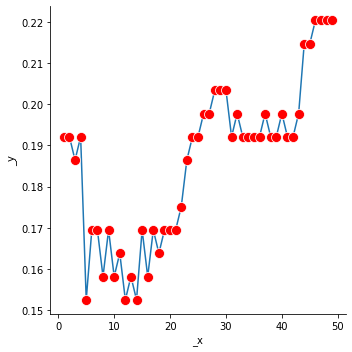

In [52]:
plt.figure(figsize=(16,9))
sns.relplot(x = range(1,50),y = error,kind='line',marker='o',markerfacecolor='red',markersize=10)
# plt.plot(range(1,11),error)

In [53]:
error = []
for i in range(1,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_i = model_knn.predict(x_test)
    error.append(1-accuracy_score(y_test,pred_i))

<Figure size 1152x648 with 0 Axes>

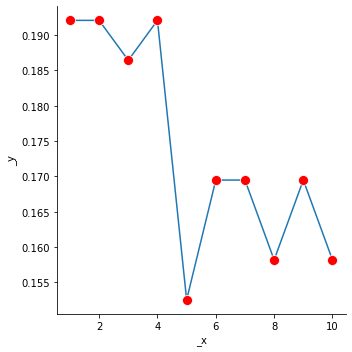

In [54]:
plt.figure(figsize=(16,9))
sns.relplot(x = range(1,11),y = error,kind='line',marker='o',markerfacecolor='red',markersize=10)
# plt.plot(range(1,11),error)